# Main File

To sort file, increment by 1 the 2nd character.<br>If need to add an intermediate step: une the bisector (forward or backward) on the 3th character ( eg: forward M -> G , backward M->T)  <br> A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [63]:
from pathlib import Path
from IPython.display import display
import joblib
import numpy as np
import pandas as pd
import geopandas as gpd

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
sns.set_theme(style="whitegrid", palette="Set2")

The process 'preprocess_01MM' take a lot of time therefore it is better to run it once.  
The result is saved in a file for later used.

## preprocess_01MM : Limites Administratives

In [2]:
# %run ./preprocess_01MM.ipynb

## preprocess_02MM : Arrondissements

(186, 5)


,IdenfiantSecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement
0,4,RDP-91,17,RDP,R.D.P. / P.A.T.
1,4,RDP-91,17,RDP,R.D.P. / P.A.T.
2,5,RDP-92,17,RDP,R.D.P. / P.A.T.


(34, 9)


,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry
0,34,Anjou,REM09,9,AJ,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ..."
1,33,Pointe-Claire,66097,8,PC,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((-73.76847 45.41859, -73.77866 ..."
2,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ..."


   ArrondissementCode ABREV
0                 RDP    RP
1                 VMA    VM
2                 S-O    SO
3                 PMR    PM
4                 AHU    AC
5                 RPP    RO
6                 VSP    VS
7                 CDN    CN
8                 MHM    MH
9                 ANJ    AJ
10                LAC    LC
11                LAS    LS
12                MTN    MN
13                OUT    OM
14                PRF    PR
15                SLA    LR
16                SLE    LN
17                VER    VD
18                IBI    IS
19                WES    WM
Index(['CODEID', 'NOM', 'CODEMAMH', 'NUM', 'ABREV', 'TYPE', 'COMMENT',
       'DATEMODIF', 'geometry', 'ArrondissementCode'],
      dtype='object')
(20, 10) (34, 38) (20, 49)


,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry,ArrondissementCode,...,streets_per_node_counts_8,streets_per_node_proportions_8,streets_per_node_counts_9,streets_per_node_proportions_9,streets_per_node_counts_10,streets_per_node_counts_11,streets_per_node_counts_12,streets_per_node_proportions_10,streets_per_node_proportions_11,streets_per_node_proportions_12
0,34,Anjou,REM09,9,AJ,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ...",ANJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ...",RPP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22,Westmount,66032,4,WM,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((-73.59513 45.47645, -73.59469 ...",WES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,Mercier-Hochelaga-Maisonneuve,REM22,23,MH,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.56970 45.59660, -73.56947 ...",MHM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,Le Sud-Ouest,REM20,21,SO,Arrondissement,Il est important de noter que la limite située...,2022-08-24,"MULTIPOLYGON (((-73.63530 45.45078, -73.63524 ...",S-O,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(20, 49) (186, 5) (186, 53)


/var/folders/ml/k9khjmr57qqcw3y03b7k154c0000gn/T/ipykernel_82481/3633662145.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  adm_feat.to_latex(filename)


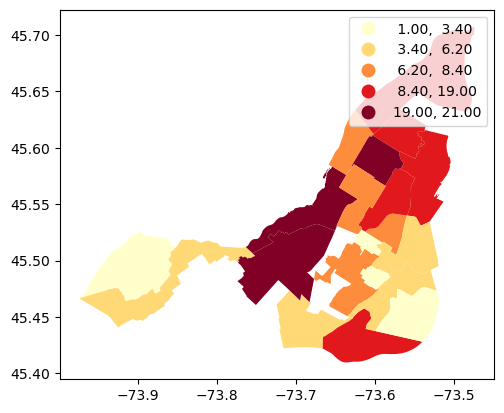

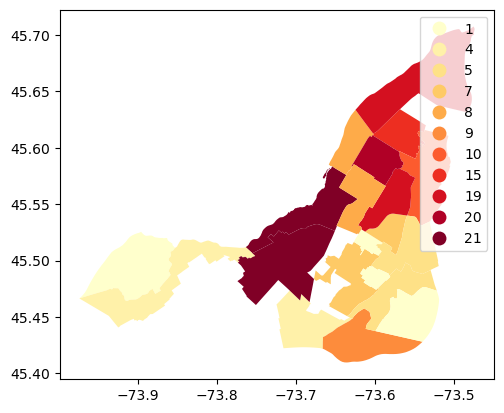

,secteur_count,area
ArrondissementCode,,
AHU,21,5.214740e+07
SLA,21,8.764706e+07
SLE,20,2.759526e+07
RDP,19,1.049463e+08
RPP,19,3.239825e+07
ANJ,15,2.839600e+07
MHM,10,5.594018e+07
LAS,9,5.118610e+07
VSP,8,3.361519e+07


THE END of preprocess 02MM


/var/folders/ml/k9khjmr57qqcw3y03b7k154c0000gn/T/ipykernel_82481/1379615751.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  frame.to_latex(filename)


In [14]:
%run ./preprocess_02MM.ipynb

In [18]:
adm_features.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   CODEID                           20 non-null     int64   
 1   NOM                              20 non-null     object  
 2   CODEMAMH                         20 non-null     object  
 3   NUM                              20 non-null     int64   
 4   ABREV                            20 non-null     object  
 5   TYPE                             20 non-null     object  
 6   COMMENT                          2 non-null      object  
 7   DATEMODIF                        20 non-null     object  
 8   geometry                         20 non-null     geometry
 9   ArrondissementCode               20 non-null     object  
 10  index                            20 non-null     object  
 11  n                                20 non-null     int64   
 12  m 

In [19]:
#adm_secteur.info() # Not neede yet

In [ ]:
## preprocess_03MM : ????

In [ ]:
# %run ./preprocess_03MM.ipynb

In [216]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, StratifiedGroupKFold, GroupShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import  Lasso, LassoLarsIC, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

In [88]:
# view : https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html
from sklearn import set_config, config_context
#set_config(transform_output="pandas")

In [22]:
#X_train, X_test, rest_train, rest_test = train_test_split(X, rest, test_size=0.30, random_state=42
#                                                    , stratify=gdf[y_cluster[0]])

y_train = adm_features['ABREV']
X_train = adm_features.drop(columns=['geometry','index','CODEMAMH','NUM','ABREV','DATEMODIF','ArrondissementCode'])

In [33]:
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
print(f'\nThere are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(f'\nThere are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

def build_pipeline(estimator, numerical, categorical, scaling=True):
    """ Build a robust pipeline with the given regression model
    Keyword arguments:
    regressor -- the regression model
    categorical -- the list of categorical features
    scaling -- whether or not to scale the data
    
    Returns: a pipeline
    """
    cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                             OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    num_pipe = make_pipeline(SimpleImputer(strategy='median'))
    if scaling:
        num_pipe.steps.insert(1,["scaler", MinMaxScaler()]) 
    transform = make_column_transformer((cat_pipe, categorical),(num_pipe,numerical), remainder="passthrough") # 
    
    # Give a name to the regressor so that we can tune it more easily
    return Pipeline(steps=[('preprocess', transform), ('estimator', estimator)])





There are 41 numerical features: 

['CODEID', 'n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg', 'streets_per_node_avg', 'intersection_count', 'street_length_total', 'street_segment_count', 'street_length_avg', 'circuity_avg', 'self_loop_proportion', 'streets_per_node_counts_0', 'streets_per_node_counts_1', 'streets_per_node_counts_2', 'streets_per_node_counts_3', 'streets_per_node_counts_4', 'streets_per_node_counts_5', 'streets_per_node_proportions_0', 'streets_per_node_proportions_1', 'streets_per_node_proportions_2', 'streets_per_node_proportions_3', 'streets_per_node_proportions_4', 'streets_per_node_proportions_5', 'streets_per_node_counts_6', 'streets_per_node_proportions_6', 'streets_per_node_counts_7', 'streets_per_node_proportions_7', 'streets_per_node_counts_8', 'streets_per_node_proportions_8', 'streets_per_node_counts_9', 'streets_per_node_proportions_9', 'streets_per_node_counts_10', 'streets_per_node_counts_11', 'streets_per_node_counts_12', 'streets_per_node_pr

In [35]:
#workaround .... :(    explore: pipe.set_params(clf__C=10)
a = build_pipeline(estimator=None,numerical=numerical_features, categorical=categorical_features,
                      scaling=True)
X_fit = a.fit_transform(X_train)

In [36]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_fit, quantile=0.2, n_samples=500)

In [209]:
#estimator = MeanShift(bandwidth=bandwidth, bin_seeding=True) # Find 3 clusters
estimator = KMeans(n_clusters=4, random_state=0, n_init="auto")

pipe = build_pipeline(estimator=estimator,numerical=numerical_features, categorical=categorical_features,
                      scaling=True)

In [210]:
model = pipe
model.fit(X_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['NOM', 'TYPE', 'COMMENT']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='...
                                                   'streets_per_node_proportions_2',
                                                   'streets_per_node_proportions_3',
                                                   'streets_per_node_proportions_4',
                                                   'streets_per_node_proportions_5',
                                                   'streets_per_node_counts_6',
                                                   'streets_per_node_proportions_6',
                                                   'streets_per_node_counts_7',
                                                   'streets_per_node_proportions_7',
                                                   'streets_per_node_counts_8', ...])])),
                ('estimator',
                 KMeans(n_clusters=4, n_init='auto', random_state=0))])

In [225]:
model[:-1].classes_

AttributeError: 'ColumnTransformer' object has no attribute 'classes_'

In [211]:
labels = model[-1].labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

print(labels)

cluster_centers = model[-1].cluster_centers_
#print(cluster_centers)

#y_pred = model.fit_predict(X_train)
#print(y_pred)

#model[:-1].get_feature_names_out()

number of estimated clusters : 4
[3 2 0 2 2 3 2 2 2 2 2 2 0 1 3 3 2 3 1 2]


# NEED TO USE SECTORS instead of ARRONDISSEMENTS IN ORDER TO INCREASE THE NUMBER OF SAMPLES



# ALSO HOW TO IMPROVE https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html


In [221]:
estimator = PCA(n_components=2)


#estimator = MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2, normalized_stress="auto") # not working yet

#estimator = TSNE(
#        n_components=2,
#        n_iter=5,
#        n_iter_without_progress=7,
#        n_jobs=2,
#        random_state=0,
#    )

pipe = build_pipeline(estimator=estimator,numerical=numerical_features, categorical=categorical_features,
                      scaling=True)

with config_context(transform_output="pandas"):
    reduced_data = pipe.fit_transform(X_train)

In [222]:
reduced_data['group'] = labels
reduced_data['Arrondissement'] = y_train
reduced_data['area'] = adm_features['area']

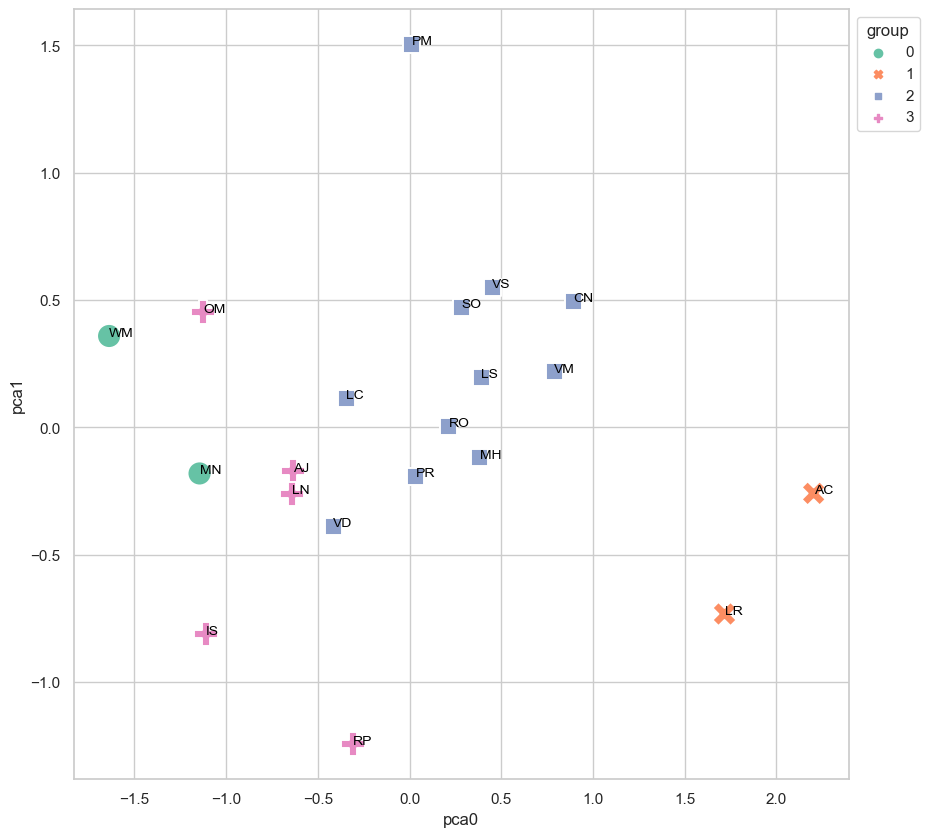

In [227]:
filename = Path('media','clustering_'+str(n_clusters_)+'.png')

#sns.set(style="darkgrid")
sns.set_theme(style="whitegrid", palette="Set1")

fig, ax = plt.subplots(figsize=(10,10))
g = sns.scatterplot(
    data=reduced_data,
    x="pca0", y="pca1",
    hue="group", style="group",
    #size="area",
    s=300,
    palette="Set2")

for i,d in reduced_data.T.items():
    plt.text(d['pca0'],d['pca1'],d['Arrondissement'], horizontalalignment='left', size='small', color='black')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.show()

fig.savefig(filename)  

In [215]:
# do with 3 PCA sns.pairplot(reduced_data, 
#%matplotlib inline
#sns.set_theme(style="whitegrid", palette="pastel")
#sns.set_theme()
#g = sns.relplot(
#    data=reduced_data,
#    x="pca0", y="pca2",
#    hue="group", style="group",
#    size="area")